Use pip to install Scikit-learn using the following command:

In [ ]:
pip install Scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


import Scikit learn and Pandas using the following commands:

In [ ]:
import sklearn
import pandas as pd

After importing sklearn, we can easily import the dataset from it, using the following command:

In [ ]:
from sklearn.datasets import load_iris

We need to import Pandas now, because we are going to load the imported data into a Pandas DataFrame and use head() and tail() functions of Python Pandas to display the content of the DataFrame.

In [ ]:
iriss = load_iris()
df_iris = pd.DataFrame(iriss.data, columns=iriss.feature_names)

Let’s display the records from this DataFrame using the head() function:

In [ ]:
df_iris.head(7)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3


Now, let’s see how to display the records from the DataFrame, using the tail() function:

In [ ]:
df_iris.tail(7)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
143,6.8,3.2,5.9,2.3
144,6.7,3.3,5.7,2.5
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


Now, let’s see how we can check the data types of the fields present in the DataFrame

In [ ]:
df_iris.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

Data Visualization


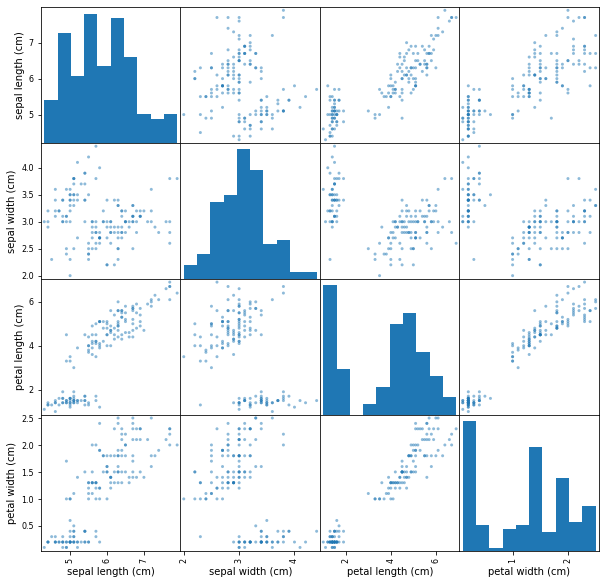

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
scatter_matrix(df_iris,figsize=(10,10))
plt.show()

We can also use Seaborn library to create pairplots of all features in the dataset against each other. To use Seaborn, we need to import Seaborn library, first

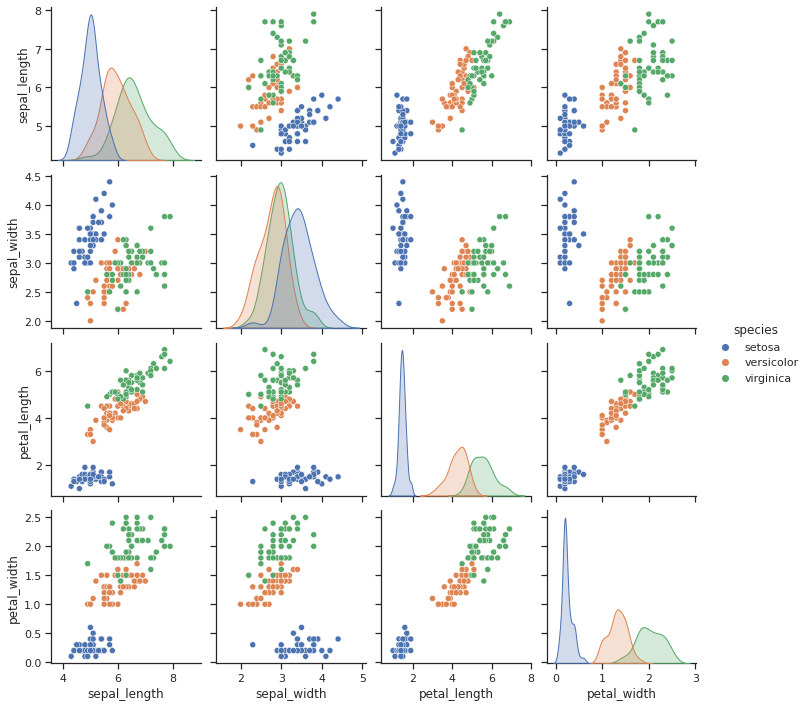

In [ ]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
dfiris = sns.load_dataset("iris")
sns.pairplot(dfiris, hue="species")

We can also use a different color palette, using palette attribute of the pairplot, as shown below:

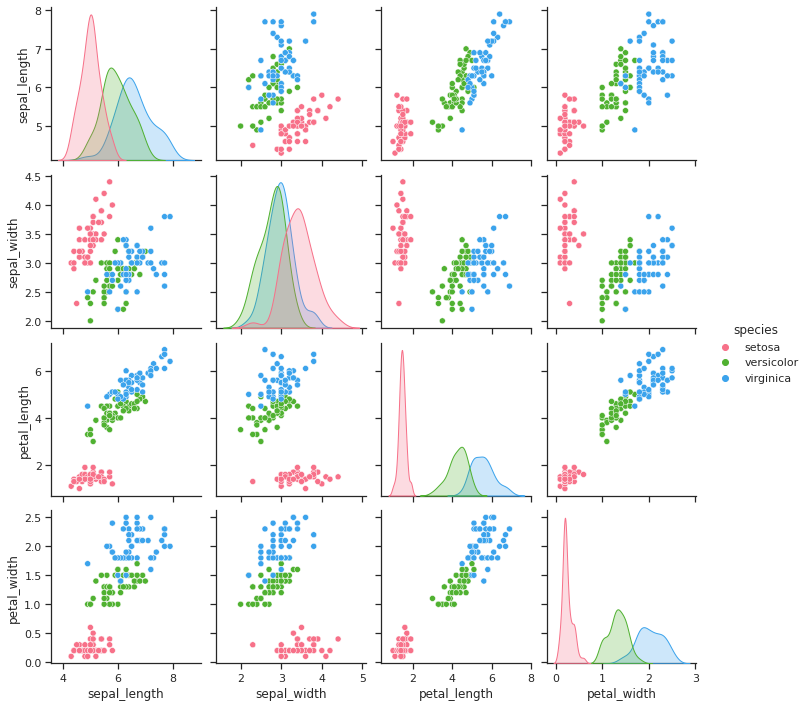

In [ ]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
dfiris = sns.load_dataset("iris")
sns.pairplot(dfiris, hue="species", palette="husl")

Preparing Data
Right now, we have the data in Pandas DataFrame. Before we start with the Machine Learning model, we need to convert the data into NumPy arrays, because sklearn works well with data in the form of NumPy arrays. It does not work with Pandas DataFrame.

This can be done using the following command:

In [ ]:
import numpy as np
labels = np.asarray(dfiris.species)

Sklearn comes with a tool, LabelEncoder(), that can encode label strings into numeric representations. It goes through the label and converts the first unique string as 0, then the next as 1, and so on. Let’s see how to use it:

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(labels)
labels = le.transform(labels)

Now, we will remove all features that we don’t need from our DataFrame using the drop() method:

In [ ]:
df_selected1 = dfiris.drop(['sepal_length', 'sepal_width', "species"], axis=1)

After this, the only features we are left with are petal length and petal width.

In [ ]:
df_features = df_selected1.to_dict(orient='records')
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
features = vec.fit_transform(df_features).toarray()

Training Set and Test Set

In [ ]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(
features, labels, test_size=0.20, random_state=0)

SVM (Support Vector Machine)
In Machine Learning, SVM or support vector machine is a learning algorithm where the algorithm analyzes the data and builds a model that is used mainly for classification or regression techniques of Machine Learning.
Here, in our case, we are using the SVM model for classification.
Computing accuracy using the test se

In [ ]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(features_train, labels_train)
svm_predictions = svm_model_linear.predict(features_test)
accuracy = svm_model_linear.score(features_test, labels_test)
print("Test accuracy:",accuracy)

Test accuracy: 1.0


Computing accuracy using Train set:

In [ ]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(features_train, labels_train)
svm_predictions = svm_model_linear.predict(features_train)
accuracy = svm_model_linear.score(features_train, labels_train)
print('Train accuracy:',accuracy)

Train accuracy: 0.9583333333333334


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print("Feature names:", feature_names)
print("Target names:", target_names)
print("\nFirst 10 rows of X:\n", X[:10])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

First 10 rows of X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size = 0.3, random_state = 1
)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size = 0.4, random_state=1
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
classifier_knn = KNeighborsClassifier(n_neighbors = 3)
classifier_knn.fit(X_train, y_train)
y_pred = classifier_knn.predict(X_test)
# Finding accuracy by comparing actual response values(y_test)with predicted response value(y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
# Providing sample data and the model will make prediction out of that data

sample = [[5, 5, 3, 2], [2, 4, 3, 5]]
preds = classifier_knn.predict(sample)
pred_species = [iris.target_names[p] for p in preds]
print("Predictions:", pred_species)

Accuracy: 0.9833333333333333
Predictions: ['versicolor', 'virginica']


In [ ]:
import numpy as np
from sklearn import preprocessing
Input_data = np.array([[2.1, -1.9, 5.5],
                       [-1.5, 2.4, 3.5],
                       [0.5, -7.9, 5.6],
                       [5.9, 2.3, -5.8]])
data_binarized = preprocessing.Binarizer(threshold=0.5).transform(Input_data)
print("\nBinarized data:\n", data_binarized)


Binarized data:
 [[1. 0. 1.]
 [0. 1. 1.]
 [0. 0. 1.]
 [1. 1. 0.]]


In [ ]:
import numpy as np
from sklearn import preprocessing
input_data = np.array([
   [2.1, -1.9, 5.5],
   [-1.5, 2.4, 3.5],
   [0.5, -7.9, 5.6],
   [5.9, 2.3, -5.8]]
)

#displaying the mean and the standard deviation of the input data
print("Mean =", input_data.mean(axis=0))
print("Stddeviation = ", input_data.std(axis=0))
#Removing the mean and the standard deviation of the input data

data_scaled = preprocessing.scale(input_data)
print("Mean_removed =", data_scaled.mean(axis=0))
print("Stddeviation_removed =", data_scaled.std(axis=0))

Mean = [ 1.75  -1.275  2.2  ]
Stddeviation =  [2.71431391 4.20022321 4.69414529]
Mean_removed = [1.11022302e-16 0.00000000e+00 0.00000000e+00]
Stddeviation_removed = [1. 1. 1.]
